In [59]:
from sklearn.datasets import fetch_openml

In [60]:
mnist = fetch_openml('mnist_784', version =1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [61]:
X, y = mnist["data"].values, mnist["target"].values
X.shape

(70000, 784)

In [62]:
y.shape

(70000,)

In [63]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [64]:
some_digit = X[0]
some_digit_image = some_digit.reshape(28,28)

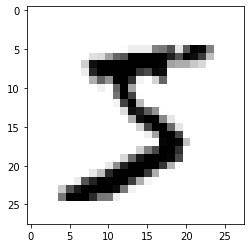

In [65]:
plt.imshow(some_digit_image, cmap = mpl.cm.binary, interpolation = "nearest")

In [66]:
y[0]

'5'

In [69]:
import numpy as np
y = y.astype(np.uint8)

In [91]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000],y[60000:]
X_train.shape
type(X)
type(y)

numpy.ndarray

In [87]:
y_train_5 = (y_train ==5)
y_test_5 = (y_test ==5)
X_train.shape
y_train_5.shape
X_test.shape

(10000, 784)

In [78]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3,random_state = 42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [79]:
sgd_clf.predict([some_digit])
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

In [94]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

In [95]:
skfolds = StratifiedKFold(n_splits =3, random_state=42,shuffle =True)
y_test_5.shape
print(train_index)
test_index

[    1     3     4 ... 59994 59996 59998]


array([    0,     2,     6, ..., 59995, 59997, 59999])

In [104]:
for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train_5[test_index]

    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

0.9669
0.91625
0.96785


In [105]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf,X_train,y_train_5,cv=3,scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

In [106]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X, y= None):
        pass
    def predict(self,X):
        return np.zeros((len(X),1),dtype =bool)


In [107]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf,X_train,y_train_5,cv=3,scoring="accuracy")

array([0.91125, 0.90855, 0.90915])

In [108]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5,cv=3)

In [110]:
from sklearn.metrics import confusion_matrix

In [111]:
confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]])

In [112]:
y_train_perfect_predictions = y_train_5
confusion_matrix(y_train_5,y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]])

In [113]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5, y_train_pred)

0.8370879772350012

In [114]:
recall_score(y_train_5, y_train_pred)

0.6511713705958311

In [115]:
from sklearn.metrics import f1_score
f1_score(y_train_5,y_train_pred)

0.7325171197343846

In [116]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([2164.22030239])

In [117]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)

In [118]:
y_some_digit_pred

array([ True])

In [119]:
threshold = 8000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [121]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
                            method = "decision_function")

In [122]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

In [123]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1],"b--",label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.legend()

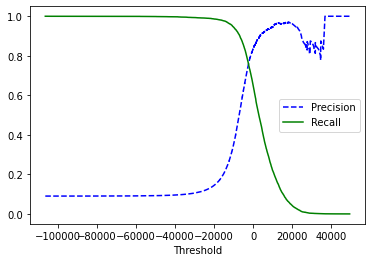

In [124]:
plot_precision_recall_vs_threshold(precisions,recalls, thresholds)
plt.show()

In [125]:
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]

In [126]:
threshold_90_precision

3370.0194991439557

In [127]:
y_train_pred_90 = (y_scores >= threshold_90_precision)

In [128]:
precision_score(y_train_5, y_train_pred_90)

0.9000345901072293

In [129]:
recall_score(y_train_5, y_train_pred_90)

0.4799852425751706

In [130]:
from sklearn.metrics import roc_curve

fpr,tpr, thresholds = roc_curve(y_train_5, y_scores)

In [131]:
def plot_roc_curve(fpr,tpr,label = None):
    plt.plot(fpr,tpr, linewidth =2,label=label)
    plt.plot([0,1],[0,1],'k--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()

No handles with labels found to put in legend.


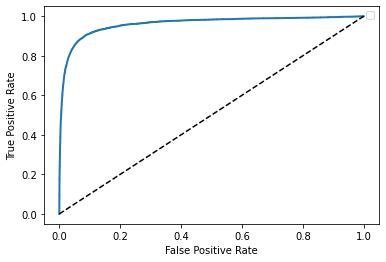

In [132]:
plot_roc_curve(fpr,tpr)
plt.show()

In [133]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.9604938554008616

In [135]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state = 42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3,
                                   method ="predict_proba")

In [136]:
print(y_probas_forest)
y_scores_forest = y_probas_forest[:, 1]
fpr_forest,tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)

[[0.11 0.89]
 [0.99 0.01]
 [0.96 0.04]
 ...
 [0.02 0.98]
 [0.92 0.08]
 [0.94 0.06]]


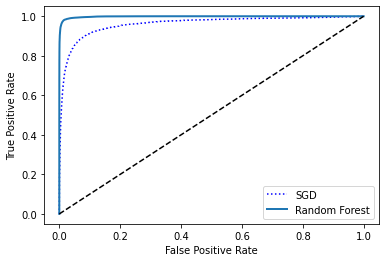

In [138]:
plt.plot(fpr,tpr,"b:", label ="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right")
plt.show()

In [139]:
roc_auc_score(y_train_5, y_scores_forest)

0.9983436731328145

In [141]:
y_train_pred_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3)
precision_score(y_train_5, y_train_pred_forest)

0.9905083315756169

In [142]:
recall_score(y_train_5,y_train_pred_forest)

0.8662608374838591

In [143]:
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

array([3], dtype=uint8)

In [144]:
some_digit_scores = sgd_clf.decision_function([some_digit])
some_digit_scores

array([[-31893.03095419, -34419.69069632,  -9530.63950739,
          1823.73154031, -22320.14822878,  -1385.80478895,
        -26188.91070951, -16147.51323997,  -4604.35491274,
        -12050.767298  ]])

In [145]:
np.argmax(some_digit_scores)

3

In [146]:
sgd_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [147]:
sgd_clf.classes_[5]

5

In [148]:
from sklearn.multiclass import OneVsOneClassifier
ovo_clf = OneVsOneClassifier(SGDClassifier(random_state=42))
ovo_clf.fit(X_train,y_train)
ovo_clf.predict([some_digit])

array([5], dtype=uint8)

In [149]:
len(ovo_clf.estimators_)

45

In [150]:
forest_clf.fit(X_train,y_train)
forest_clf.predict([some_digit])

array([5], dtype=uint8)

In [151]:
forest_clf.predict_proba([some_digit])

array([[0.  , 0.  , 0.01, 0.08, 0.  , 0.9 , 0.  , 0.  , 0.  , 0.01]])

In [153]:
cross_val_score(sgd_clf, X_train,y_train, cv=3, scoring="accuracy")

array([0.87365, 0.85835, 0.8689 ])

In [154]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([0.8983, 0.891 , 0.9018])

In [161]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train,y_train_pred)

In [162]:
conf_mx

array([[5577,    0,   22,    5,    8,   43,   36,    6,  225,    1],
       [   0, 6400,   37,   24,    4,   44,    4,    7,  212,   10],
       [  27,   27, 5220,   92,   73,   27,   67,   36,  378,   11],
       [  22,   17,  117, 5227,    2,  203,   27,   40,  403,   73],
       [  12,   14,   41,    9, 5182,   12,   34,   27,  347,  164],
       [  27,   15,   30,  168,   53, 4444,   75,   14,  535,   60],
       [  30,   15,   42,    3,   44,   97, 5552,    3,  131,    1],
       [  21,   10,   51,   30,   49,   12,    3, 5684,  195,  210],
       [  17,   63,   48,   86,    3,  126,   25,   10, 5429,   44],
       [  25,   18,   30,   64,  118,   36,    1,  179,  371, 5107]])

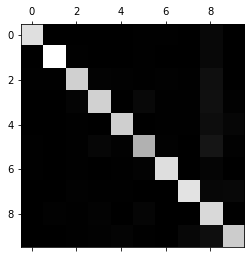

In [163]:
plt.matshow(conf_mx, cmap = plt.cm.gray)
plt.show()

In [164]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

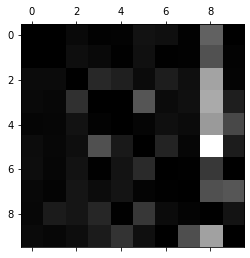

In [165]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap = plt.cm.gray)
plt.show()

In [169]:
cl_a, cl_b = 3, 5
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

In [188]:
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]

    n_rows = (len(instances) - 1) // images_per_row + 1 #4+1 = 5
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = plt.cm.binary, **options)
    plt.axis("off")

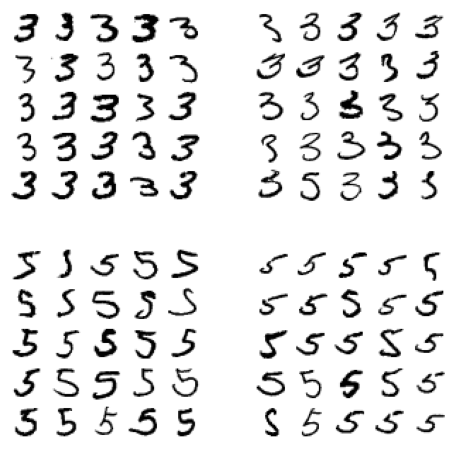

In [189]:
plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25],images_per_row =5)
plt.subplot(222); plot_digits(X_ab[:25],images_per_row = 5)
plt.subplot(223); plot_digits(X_ba[:25],images_per_row =5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row =5)
plt.show()

In [190]:
import numpy

In [191]:
from sklearn.neighbors import KNeighborsClassifier

In [192]:
y_train_large = (y_train >=7)
y_train_odd = (y_train % 2==1)
y_multilabel = np.c_[y_train_large, y_train_odd]

In [193]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier()

In [194]:
knn_clf.predict([some_digit])

array([[False,  True]])

In [195]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)
f1_score(y_multilabel, y_train_knn_pred, average="macro")

0.976410265560605

In [196]:
noise = np.random.randint(0,100, (len(X_train),784))
X_train_mod = X_train + noise
noise = np.random.randint(0,100,(len(X_test),784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

In [197]:
knn_clf.fit(X_train_mod, y_train_mod)

KNeighborsClassifier()

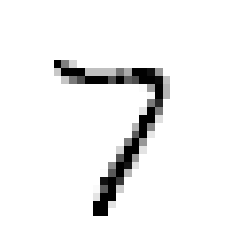

In [201]:
some_index =0
clean_digit = knn_clf.predict([X_test_mod[some_index]])
plot_digits(clean_digit)